In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data_raw=pd.read_csv('ifood_marketing.csv')
data_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data_raw.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data = data_raw.fillna(method = 'ffill')

In [6]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
# Use the get_dummies() function to create dummy variables for the 'color' column
dummies = pd.get_dummies(data['Education'], prefix='Education')
dummies2 = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')
# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummies], axis=1)
data = pd.concat([data, dummies2], axis=1)

data


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,1,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,0,0,0,1,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,1,0,0,0,0,0,0,1,0,0


In [9]:
#split the dataset into train and test sets
train = data.sample(frac=0.7, random_state=1)
test = data[data.index.isin(train.index)==False]

In [10]:
response = ['MntWines']
exclude = ['ID','Year_Birth','Dt_Customer','Education','Marital_Status','MntWines'] #excluding these variables
vitas=[x for x in list(data.columns) if x not in exclude]
train = train[response+vitas]
test = test[response+vitas]
data = data[response+vitas]

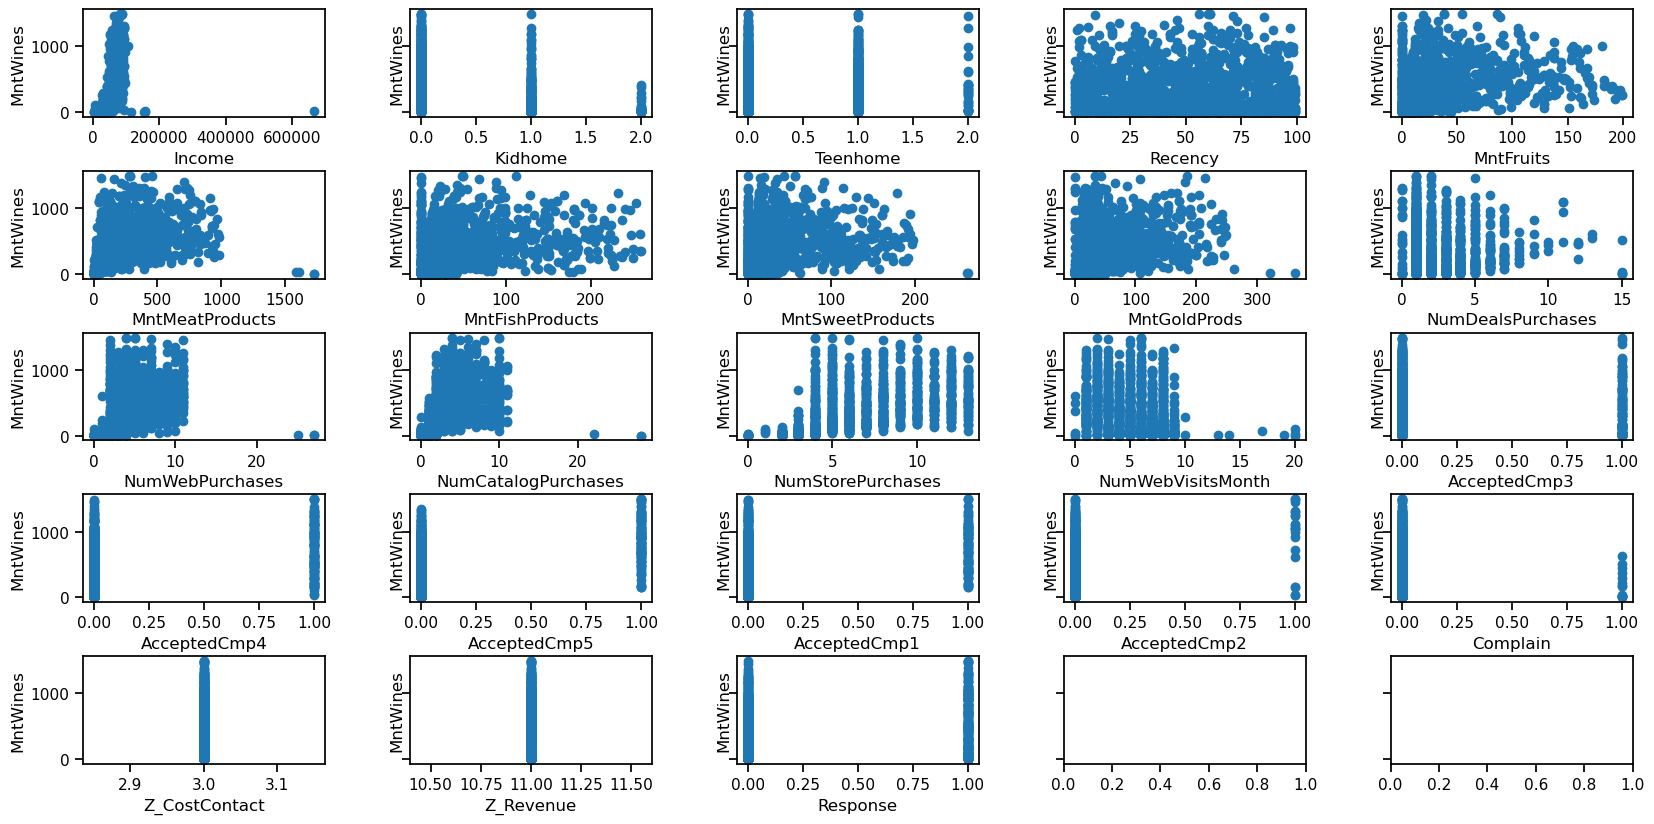

In [11]:
fig,ax = plt.subplots(5,5, sharey = "row", figsize = (20,10), dpi = 100)
for i in range(1,24):
    plt.subplot(5,5,i)
    plt.scatter(train[vitas[i-1]], y = train['MntWines'])
    plt.xlabel(vitas[i-1])
    plt.ylabel('MntWines')
    plt.subplots_adjust(wspace=0.35, hspace=0.5)
    
plt.show()

In [12]:
train.describe().round(4)

,MntWines,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,...,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000,1568.0000
mean,298.8208,51769.1020,0.4605,0.5108,49.2615,26.0829,164.5574,37.2098,26.8858,44.2009,...,0.1677,0.2181,0.0006,0.0006,0.1116,0.3839,0.2041,0.2647,0.0338,0.0006
std,333.9296,26214.5806,0.5415,0.5405,28.7236,39.4061,224.0107,54.4539,41.4391,52.2825,...,0.3737,0.4131,0.0253,0.0253,0.3150,0.4865,0.4032,0.4413,0.1808,0.0253
min,0.0000,1730.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,23.0000,34966.2500,0.0000,0.0000,25.0000,1.0000,16.0000,2.7500,1.0000,9.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,167.0000,50988.5000,0.0000,0.0000,50.0000,8.0000,68.0000,12.0000,8.0000,24.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,494.2500,67560.7500,1.0000,1.0000,74.0000,33.0000,230.2500,49.2500,32.0000,57.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000
max,1493.0000,666666.0000,2.0000,2.0000,99.0000,199.0000,1725.0000,259.0000,263.0000,362.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MntWines'>

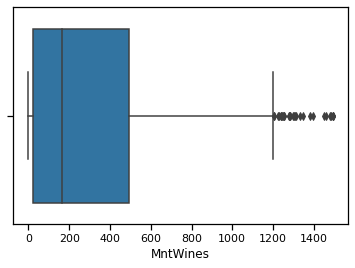

In [13]:
sns.boxplot(train['MntWines'])

In [14]:
variables = list(data.columns)

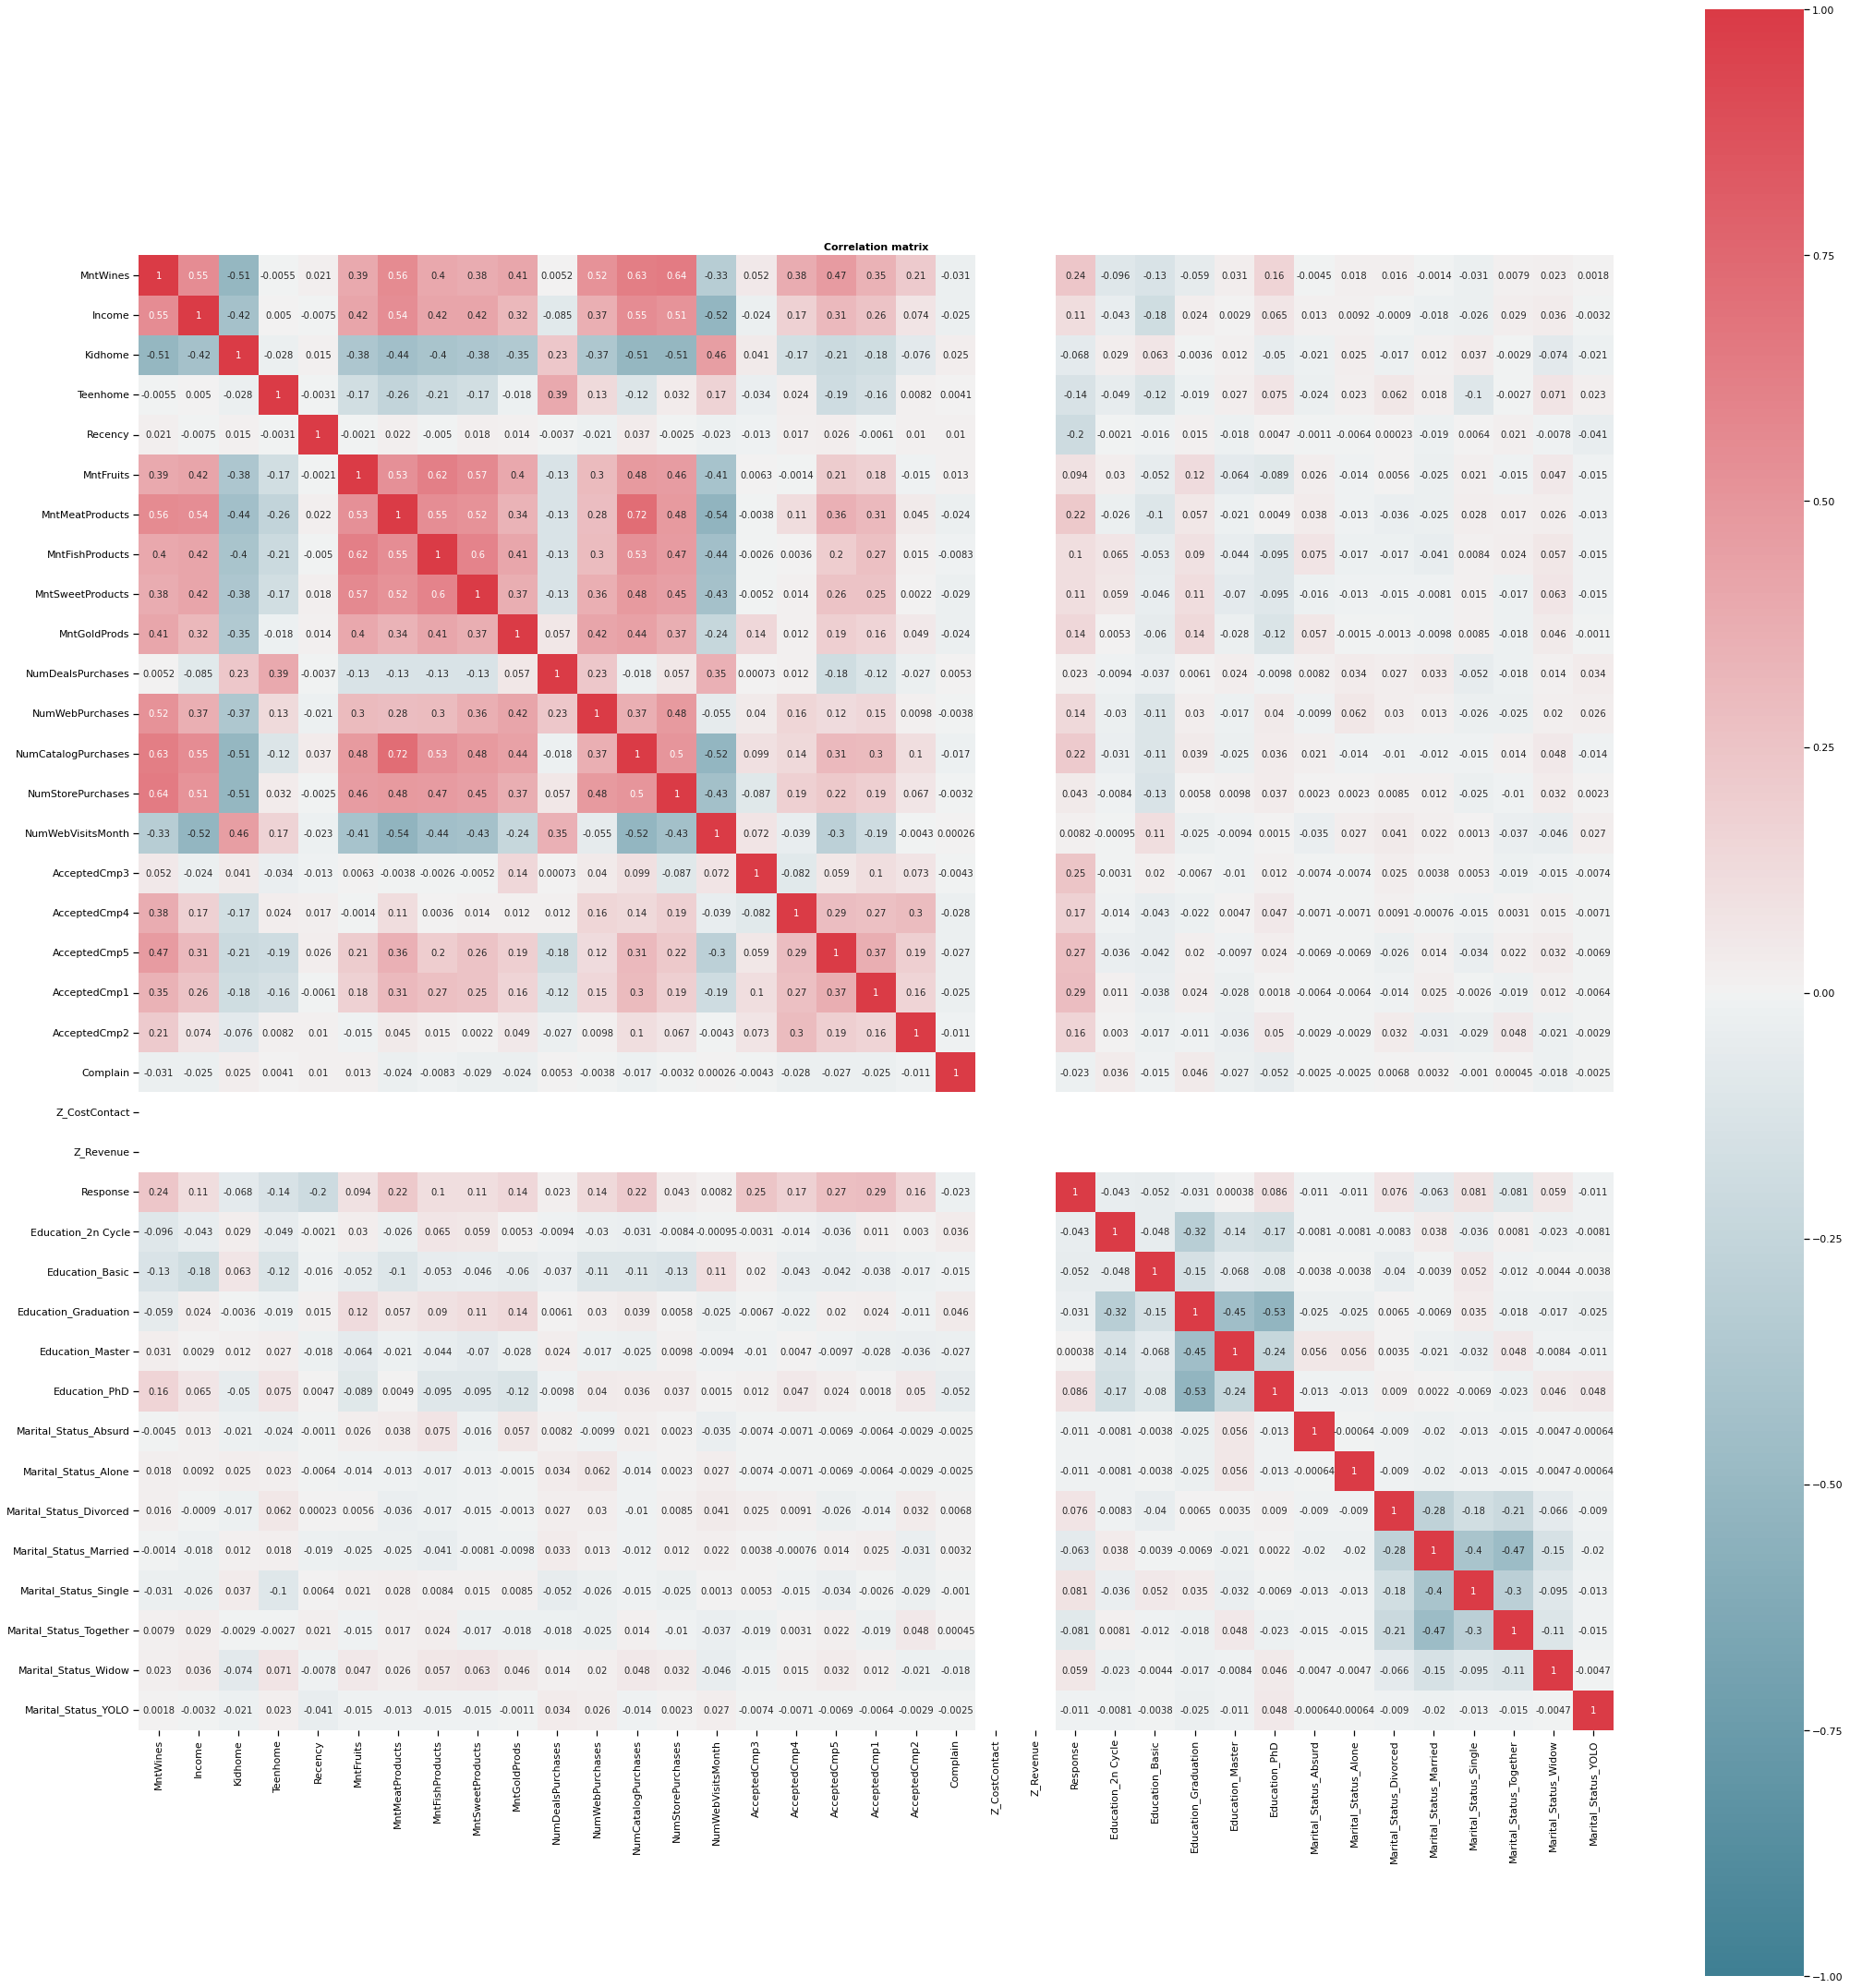

In [15]:
fig, ax = plt.subplots(figsize = (30,30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[variables].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap, annot=True)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

In [16]:
#correlation with MntWines
correlations = train.corr()
sorted_corr = correlations.sort_values(by = 'MntWines', ascending = True)
corr_Wines = sorted_corr.iloc[:, 0]
corr_Wines

Kidhome                   -0.512564
NumWebVisitsMonth         -0.326215
Education_Basic           -0.130937
Education_2n Cycle        -0.095855
Education_Graduation      -0.059261
Marital_Status_Single     -0.031019
Complain                  -0.030781
Teenhome                  -0.005517
Marital_Status_Absurd     -0.004451
Marital_Status_Married    -0.001352
Marital_Status_YOLO        0.001754
NumDealsPurchases          0.005213
Marital_Status_Together    0.007883
Marital_Status_Divorced    0.016153
Marital_Status_Alone       0.017797
Recency                    0.021480
Marital_Status_Widow       0.023316
Education_Master           0.031135
AcceptedCmp3               0.052453
Education_PhD              0.157663
AcceptedCmp2               0.214046
Response                   0.236049
AcceptedCmp1               0.346904
AcceptedCmp4               0.376612
MntSweetProducts           0.379854
MntFruits                  0.391565
MntFishProducts            0.403205
MntGoldProds               0

In [17]:
# select high correlation with MntWines: > 0.4
selected_corr = np.where(abs(corr_Wines) > 0.4)

selected_vars = corr_Wines.index[selected_corr].tolist()
selected_vars.remove('MntWines')

In [18]:
selected_vars

['Kidhome',
 'MntFishProducts',
 'MntGoldProds',
 'AcceptedCmp5',
 'NumWebPurchases',
 'Income',
 'MntMeatProducts',
 'NumCatalogPurchases',
 'NumStorePurchases']

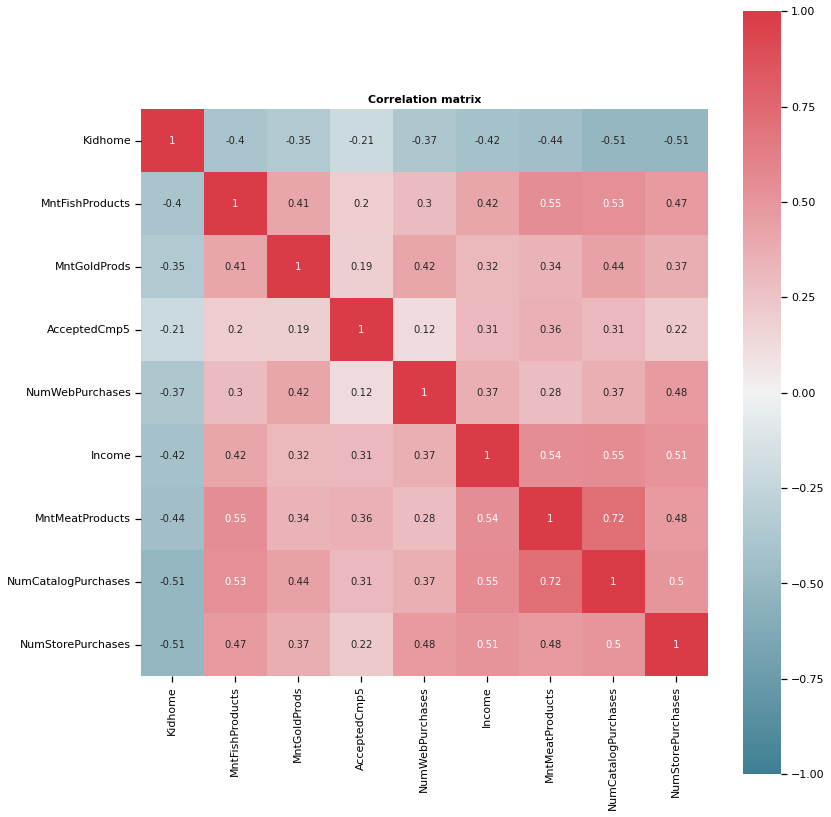

In [19]:
fig, ax = plt.subplots(figsize = (12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[selected_vars].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap, annot=True)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

In [20]:
#transform data to see outliers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data[selected_vars]), columns= selected_vars)

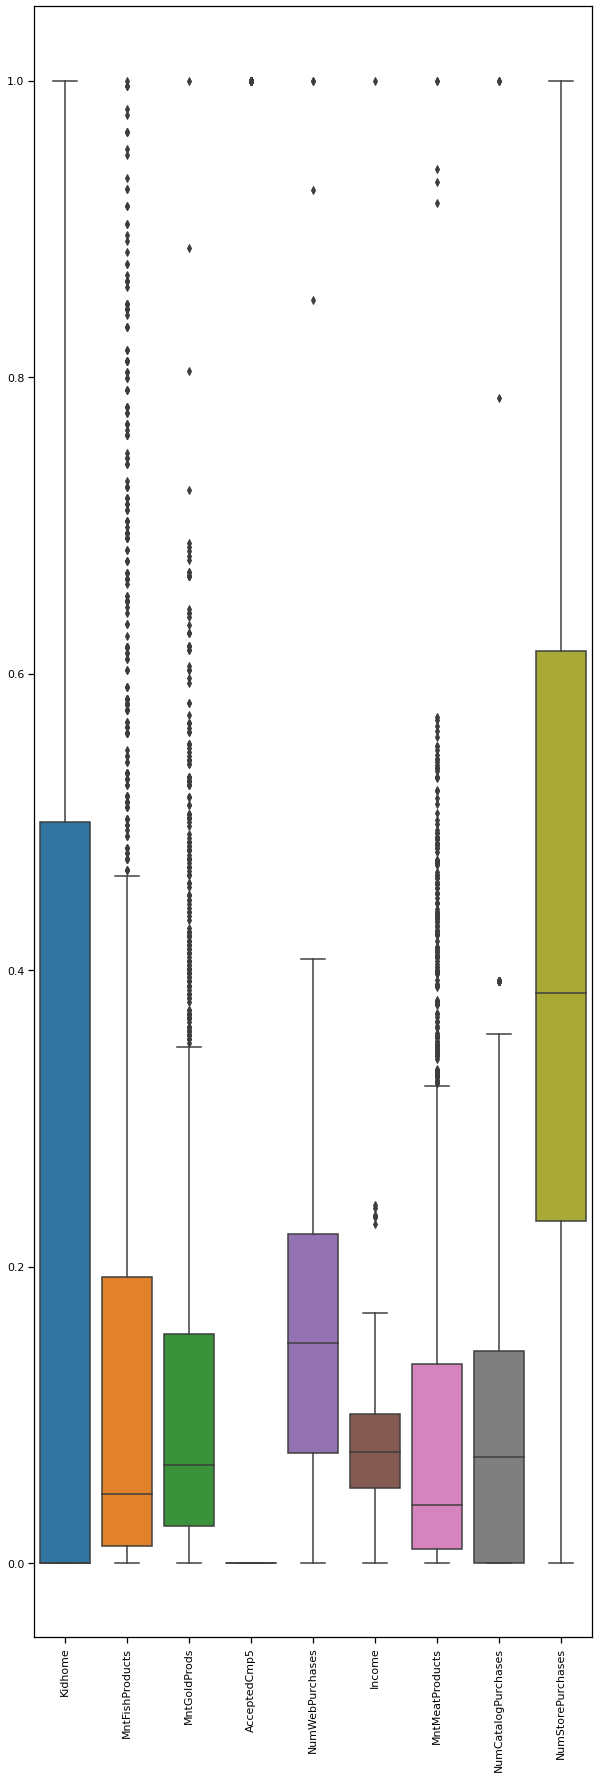

In [21]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.boxplot(data = df_scaled[selected_vars])
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='NumStorePurchases', ylabel='count'>

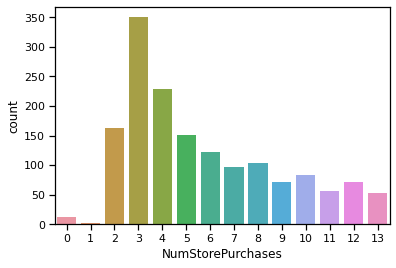

In [22]:
sns.countplot(data = train, x = 'NumStorePurchases')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\si

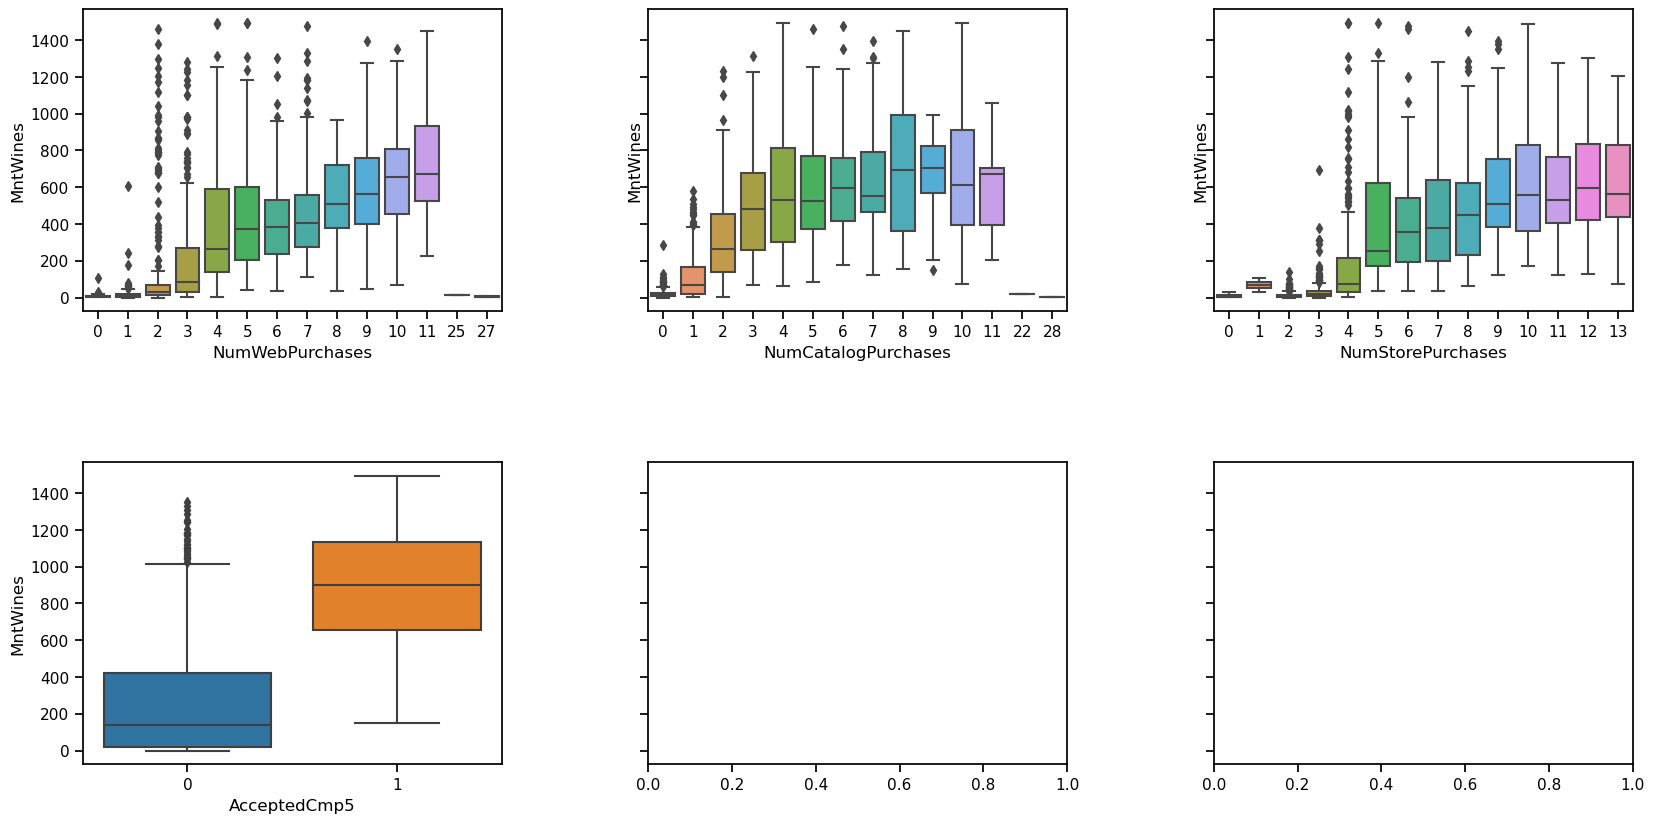

In [24]:
categoricals = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','AcceptedCmp5']
fig,ax = plt.subplots(2,3, sharey = "row", figsize = (20,10), dpi = 100)
for i in range (1,5):
    plt.subplot(2,3,i)
    sns.boxplot(train[categoricals[i-1]], y = train['MntWines'])
    plt.xlabel(categoricals[i-1])
    plt.ylabel('MntWines')
    plt.subplots_adjust(wspace=0.35, hspace=0.5)

**Linear Regression**

In [25]:
selected_variables = ['Kidhome',
 'MntFishProducts',
 'AcceptedCmp5',
 'Income',
 'NumWebPurchases',
 'MntMeatProducts',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'MntWines']

In [26]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [27]:
formula = 'MntWines ~ NumStorePurchases'
ols = smf.ols(formula=formula, data=train).fit(cov_type = 'HC0')
residuals=ols.resid
fitted = ols.fittedvalues
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     1102.
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          2.23e-183
Time:                        11:34:19   Log-Likelihood:                -10915.
No. Observations:                1568   AIC:                         2.183e+04
Df Residuals:                    1566   BIC:                         2.185e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -82.1338     10.491     -7.829      0.000    -102.695     -61.573
NumStorePurchases    66.7714      2.012     33.192      0.000      62.829      70.714
==============================================================================
Omnibus:                      519.925   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1716.965
Skew:                           1.647   Prob(JB):                         0.00
Kurtosis:                       6.929   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [28]:
prediction = ols.predict(test['NumStorePurchases'])
mae = mean_absolute_error(test['MntWines'], prediction)
rmse = np.sqrt(mean_squared_error(test['MntWines'], prediction))
aic = ols.aic
bic = ols.bic
print(f'MAE on test set : {mae}')

MAE on test set : 186.66527215286578


**Model 1: full parameters**

In [29]:
formula = 'MntWines ~ Kidhome + Income + NumWebPurchases +MntMeatProducts +NumStorePurchases + NumCatalogPurchases + MntFishProducts+ AcceptedCmp5'
ols1 = smf.ols(formula=formula, data=train).fit(cov_type = 'HC0')
residuals1=ols1.resid
fitted_1 = ols1.fittedvalues
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     327.4
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:34:19   Log-Likelihood:                -10495.
No. Observations:                1568   AIC:                         2.101e+04
Df Residuals:                    1559   BIC:                         2.106e+04
Df Model:                           8                                         
Covariance Type:                  HC0                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -96.6968     25.840     -3.742      0.000    -147.343     -46.051
Kidhome               -49.7494     10.889     -4.569      0.000     -71.091     -28.408
Income                  0.0010      0.001      1.340      0.180      -0.000       0.002
NumWebPurchases        24.0919      3.598      6.695      0.000      17.039      31.145
MntMeatProducts         0.0789      0.056      1.408      0.159      -0.031       0.189
NumStorePurchases      30.3203      3.726      8.138      0.000      23.018      37.623
NumCatalogPurchases    27.8761      5.425      5.139      0.000      17.244      38.509
MntFishProducts        -0.4313      0.182     -2.375      0.018      -0.787      -0.075
AcceptedCmp5          341.8349     39.765      8.596      0.000     263.897     419.773
==============================================================================
Omnibus:                      286.272   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1326.356
Skew:                           0.788   Prob(JB):                    9.67e-289
Kurtosis:                       7.221   Cond. No.                     2.48e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
prediction_1 = ols1.predict(test[selected_vars])
mae_1 = mean_absolute_error(test['MntWines'], prediction_1)
rmse1 = np.sqrt(mean_squared_error(test['MntWines'], prediction_1))
aic1 = ols1.aic
bic1 = ols1.bic
print(f'MAE on test set : {mae_1}')

MAE on test set : 123.64123375361889


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = train[['Kidhome',
 'MntFishProducts',
 'AcceptedCmp5',
 'Income',
 'NumWebPurchases',
 'MntMeatProducts',
 'NumCatalogPurchases',
 'NumStorePurchases']]
features = sm.add_constant(features)  # make sure to include a column of 1s when using the variance inflation factor function.

vif = []
for i in range(8):
    vif.append(variance_inflation_factor(features.values, i+1))
    
vif

[1.5772430887913185,
 1.6170018025534332,
 1.1775260900403015,
 1.738437344160209,
 1.373149703928147,
 2.4725527328964243,
 2.5185047585515847,
 1.871966653840255]

_____________________________________________________________________________

In [32]:
def forward_selected(data, response, nominated = []):
    remaining = set(data.columns)
    selected = nominated
    remaining.remove(response)
    remaining ^= set(selected)
    current_score, best_new_score = float('inf'), float('inf')
    if nominated:
        formula = "{} ~ {} + 1".format(response, ' + '.join(nominated))
        current_score = mean_absolute_error(data[response], smf.ols(formula, data).fit().predict(data[nominated]))
        best_new_score = current_score
        print("you nominated variable(s) %s, the MAE is: %f" %(nominated, current_score))
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = mean_absolute_error(data[response], smf.ols(formula, data).fit().predict(data[selected + [candidate]]))
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)
        if current_score > best_new_score:
            print("adding %s decreases MAE from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with MAE of %f" %(formula, mean_absolute_error(data[response], model.predict(data[selected]))))
    return model

**Model 2: Forward selected model**

In [33]:
model_fs = forward_selected(train[selected_variables], 'MntWines', nominated=[])

adding NumStorePurchases decreases MAE from inf to 177.812279
adding NumCatalogPurchases decreases MAE from 177.812279 to 144.286534
adding NumWebPurchases decreases MAE from 144.286534 to 134.398584
adding AcceptedCmp5 decreases MAE from 134.398584 to 122.852560
adding Income decreases MAE from 122.852560 to 121.105413
adding MntFishProducts decreases MAE from 121.105413 to 120.441610
adding MntMeatProducts decreases MAE from 120.441610 to 119.771614
final model is MntWines ~ NumStorePurchases + NumCatalogPurchases + NumWebPurchases + AcceptedCmp5 + Income + MntFishProducts + MntMeatProducts + 1, with MAE of 119.771614


In [34]:
formula='MntWines ~ NumCatalogPurchases + NumStorePurchases + NumWebPurchases + AcceptedCmp5 + Income + MntFishProducts + MntMeatProducts'
ols2 = smf.ols(formula=formula, data=train).fit(cov_type = 'HC0')
residuals2=ols2.resid
fitted_2 = ols2.fittedvalues
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     340.6
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          9.48e-309
Time:                        11:34:19   Log-Likelihood:                -10505.
No. Observations:                1568   AIC:                         2.103e+04
Df Residuals:                    1560   BIC:                         2.107e+04
Df Model:                           7                                         
Covariance Type:                  HC0                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -147.2546     22.720     -6.481      0.000    -191.785    -102.725
NumCatalogPurchases    30.0217      5.504      5.454      0.000      19.234      40.810
NumStorePurchases      32.4233      3.788      8.559      0.000      24.998      39.848
NumWebPurchases        25.0465      3.648      6.866      0.000      17.896      32.197
AcceptedCmp5          344.0078     40.381      8.519      0.000     264.862     423.153
Income                  0.0011      0.001      1.336      0.181      -0.001       0.003
MntFishProducts        -0.3913      0.186     -2.103      0.035      -0.756      -0.027
MntMeatProducts         0.0831      0.057      1.448      0.148      -0.029       0.196
==============================================================================
Omnibus:                      287.454   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1411.775
Skew:                           0.774   Prob(JB):                    2.74e-307
Kurtosis:                       7.383   Cond. No.                     2.47e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
set_2 = ['MntFishProducts',
 'AcceptedCmp5',
 'Income',
 'NumWebPurchases',
 'MntMeatProducts',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'MntWines']
prediction_2 = ols2.predict(test[set_2])
mae_2 = mean_absolute_error(test['MntWines'], prediction_2)
rmse2 = np.sqrt(mean_squared_error(test['MntWines'], prediction_2))
aic2 = ols2.aic
bic2 = ols2.bic
print(f'MAE on test set : {mae_2}')


MAE on test set : 121.26819316795999


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = train[['NumCatalogPurchases' , 'NumStorePurchases', 'NumWebPurchases' , 'AcceptedCmp5' , 'Income' , 'MntFishProducts' , 'MntMeatProducts']]
features = sm.add_constant(features)  # make sure to include a column of 1s when using the variance inflation factor function.

vif = []
for i in range(7):
    vif.append(variance_inflation_factor(features.values, i+1))
    
vif

[2.4334209757622314,
 1.7721628227739454,
 1.357446347629083,
 1.1768563889264319,
 1.7305787371894823,
 1.6066694295458777,
 2.470650330550318]

In [37]:
summary=pd.DataFrame(columns=['MAE', 'RMSE', 'AIC', 'BIC', 'Adj Rsquared'], index=['LR (all predictor)', 'LR (forward selection)'], dtype='float64') 
summary.iloc[0, 0] = mae_1
summary.iloc[0, 1] = rmse1
summary.iloc[0, 2] =aic1
summary.iloc[0, 3] = bic1
summary.iloc[0, 4] =ols1.rsquared_adj

summary.iloc[1, 0] = mae_2
summary.iloc[1, 1] = rmse2
summary.iloc[1, 2] = aic2
summary.iloc[1, 3] = bic2
summary.iloc[1, 4] =ols2.rsquared_adj

summary

,MAE,RMSE,AIC,BIC,Adj Rsquared
LR (all predictor),123.641234,200.822504,21008.464867,21056.682873,0.656032
LR (forward selection),121.268193,201.327595,21025.261255,21068.121704,0.652107


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


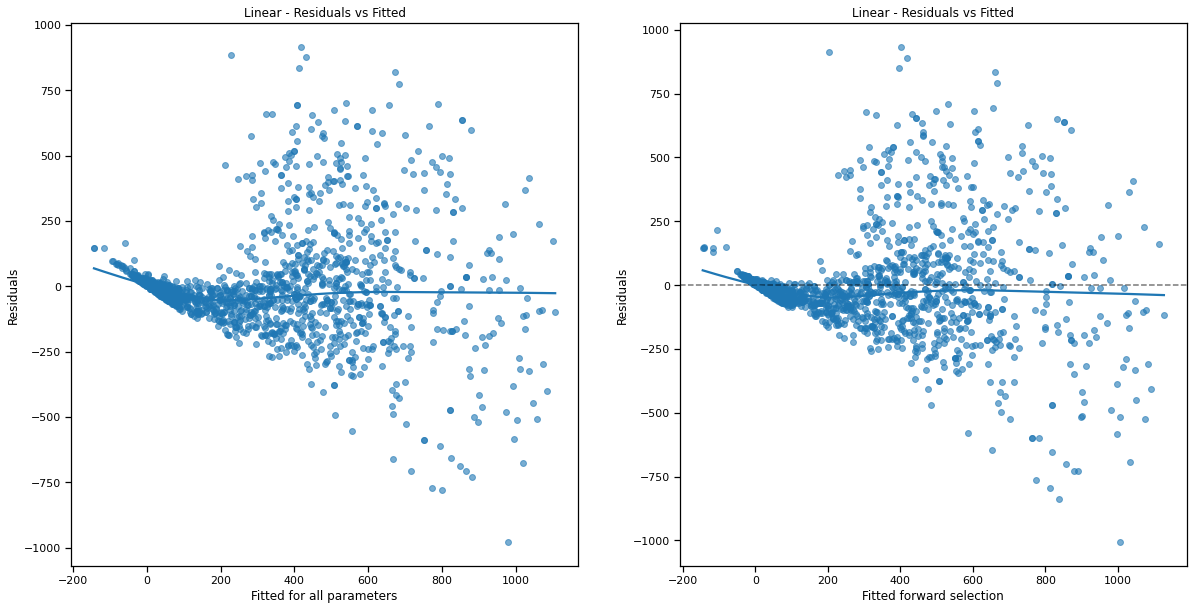

In [38]:
fig, ((ax1, ax2))= plt.subplots(1, 2, figsize=(20, 10))

sns.regplot(fitted_1, residuals1, lowess=True, ax=ax1, 
            scatter_kws={'s': 35, 'alpha': .6})
ax1.set_xlabel('Fitted for all parameters',  {'fontsize': 12})
ax1.set_ylabel('Residuals', {'fontsize': 12})
ax1.set_title('Linear - Residuals vs Fitted')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

sns.regplot(fitted_2, residuals2, lowess=True, ax=ax2, 
            scatter_kws={'s': 35, 'alpha': .6})
ax2.set_xlabel('Fitted forward selection',  {'fontsize': 12})
ax2.set_ylabel('Residuals', {'fontsize': 12})
ax2.set_title('Linear - Residuals vs Fitted')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

**KNN Medthod**

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [40]:
def knn_test(predictors, response):
    
    neighbours=np.arange(1, 51)
    cv_mae_arr = []
    best_score = -np.inf

    for k in neighbours: 
        knn = KNeighborsRegressor(n_neighbors = k, metric='mahalanobis', metric_params={'V': train[predictors].cov()}) 
        scores = cross_val_score(knn, train[predictors], train[response], cv=10, scoring = 'neg_mean_absolute_error')
        # taking the average of scores across 10 folds
        cv_score = np.mean(scores)
        loss = -cv_score
        cv_mae_arr.append(loss)
        
        # use the cv score for model selection
        if cv_score >= best_score:
            best_score = cv_score
            best_knn = knn
    
    knn = best_knn
    #train the selected model with the whole train set
    knn.fit(train[predictors], train[response])
    # Predict the test data with the selected and re-estimated model
    predictions = knn.predict(test[predictors])
    test_mae = mean_absolute_error(test[response], predictions)
    test_rmse = np.sqrt(mean_squared_error(test[response], predictions))
    cv_mae= -best_score
    print('Chosen K: {}'.format(knn.n_neighbors))
    
    # plot the cross-validation errors for different values of k
    fig, ax = plt.subplots()
    ax.plot(neighbours, cv_mae_arr, color='#FF7F0E', label='CV error')
    ax.set_xlabel('Number of neighbours')
    ax.set_ylabel('MAE')
    plt.legend()
    plt.show()
    
    return test_mae, test_rmse, cv_mae

Chosen K: 49


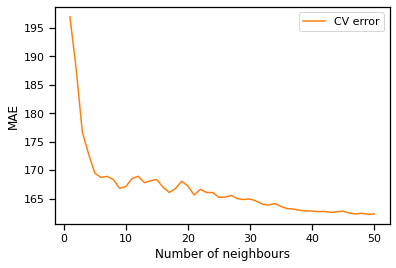

Cross validation MAE : 162.2134
Test MAE : 167.3297
Test RMSE : 254.6926


In [41]:
predictors=['NumStorePurchases']
response=['MntWines']
test_mae_1, test_rmse_1, cv_mae_1 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_1.round(4)))
print('Test MAE : {}'.format(test_mae_1.round(4)))
print('Test RMSE : {}'.format(test_rmse_1.round(4)))

Chosen K: 47


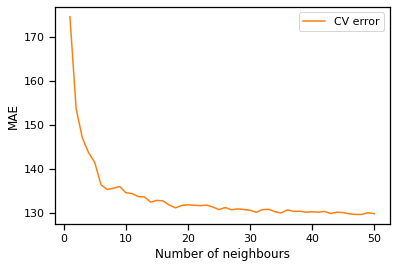

Cross validation MAE : 129.6165
Test MAE : 135.0861
Test RMSE : 212.7102


In [42]:
predictors=['NumStorePurchases','NumCatalogPurchases']
response=['MntWines']
test_mae_2, test_rmse_2, cv_mae_2 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_2.round(4)))
print('Test MAE : {}'.format(test_mae_2.round(4)))
print('Test RMSE : {}'.format(test_rmse_2.round(4)))

Chosen K: 49


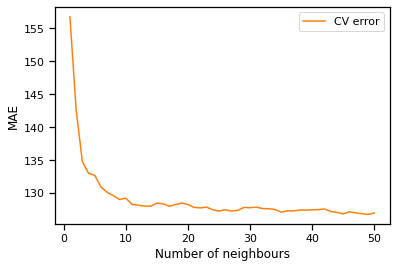

Cross validation MAE : 126.7772
Test MAE : 131.4674
Test RMSE : 210.4136


In [43]:
predictors=['NumStorePurchases', 'NumCatalogPurchases', 'MntMeatProducts']
response=['MntWines']
test_mae_3, test_rmse_3, cv_mae_3 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_3.round(4)))
print('Test MAE : {}'.format(test_mae_3.round(4)))
print('Test RMSE : {}'.format(test_rmse_3.round(4)))

Chosen K: 35


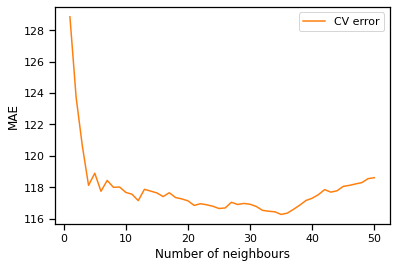

Cross validation MAE : 116.268
Test MAE : 122.5732
Test RMSE : 207.8098


In [44]:
predictors=['NumStorePurchases', 'NumCatalogPurchases', 'MntMeatProducts','NumWebPurchases']
response=['MntWines']
test_mae_4, test_rmse_4, cv_mae_4 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_4.round(4)))
print('Test MAE : {}'.format(test_mae_4.round(4)))
print('Test RMSE : {}'.format(test_rmse_4.round(4)))

Chosen K: 11


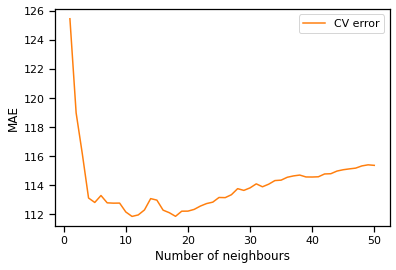

Cross validation MAE : 111.8656
Test MAE : 114.1542
Test RMSE : 195.1995


In [45]:
predictors=['NumStorePurchases', 'NumCatalogPurchases', 'MntMeatProducts', 'NumWebPurchases', 'Income']
response=['MntWines']
test_mae_5, test_rmse_5, cv_mae_5 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_5.round(4)))
print('Test MAE : {}'.format(test_mae_5.round(4)))
print('Test RMSE : {}'.format(test_rmse_5.round(4)))

Chosen K: 12


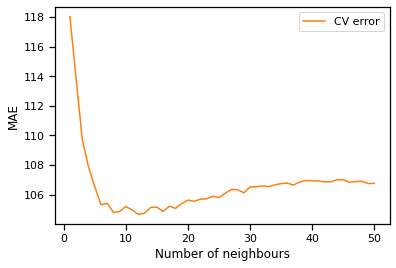

Cross validation MAE : 104.6732
Test MAE : 103.0007
Test RMSE : 179.3509


In [46]:
predictors=['NumStorePurchases', 'NumCatalogPurchases', 'MntMeatProducts', 'NumWebPurchases', 'Income', 'AcceptedCmp5']
response=['MntWines']
test_mae_6, test_rmse_6, cv_mae_6 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_6.round(4)))
print('Test MAE : {}'.format(test_mae_6.round(4)))
print('Test RMSE : {}'.format(test_rmse_6.round(4)))

Chosen K: 5


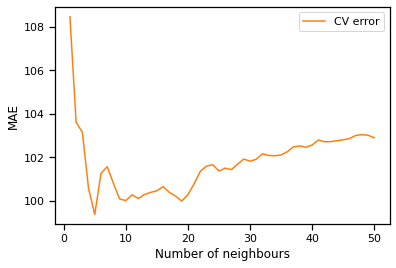

Cross validation MAE : 99.3869
Test MAE : 99.3473
Test RMSE : 181.0365


In [47]:
predictors=['NumStorePurchases', 'NumCatalogPurchases', 'MntMeatProducts', 'NumWebPurchases', 'Income', 'AcceptedCmp5', 'MntFishProducts']
response=['MntWines']
test_mae_7, test_rmse_7, cv_mae_7 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_7.round(4)))
print('Test MAE : {}'.format(test_mae_7.round(4)))
print('Test RMSE : {}'.format(test_rmse_7.round(4)))

Chosen K: 12


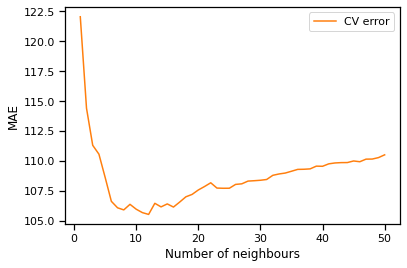

Cross validation MAE : 105.5531
Test MAE : 103.9583
Test RMSE : 179.1476


In [48]:
predictors=['NumStorePurchases', 'NumCatalogPurchases', 'MntMeatProducts', 'NumWebPurchases', 'Income', 'AcceptedCmp5','Kidhome']
test_mae_8, test_rmse_8, cv_mae_8 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_8.round(4)))
print('Test MAE : {}'.format(test_mae_8.round(4)))
print('Test RMSE : {}'.format(test_rmse_8.round(4)))

In [49]:
summary_knn=pd.DataFrame(columns=['cross validation MAE', 'test MAE', 'test RMSE'], index=['KNN (1 predictor)', 'KNN (2 predictors)', 'KNN (3 predictors)', 'KNN (4 predictors)', 'KNN (5 predictors)', 'KNN (6 predictors)', 'KNN (7 predictors)', 'KNN (8 predictors)'], dtype='float64') 
summary_knn.iloc[0, 0] = cv_mae_1
summary_knn.iloc[0, 1] = test_mae_1
summary_knn.iloc[0, 2] = test_rmse_1


summary_knn.iloc[1, 0] = cv_mae_2
summary_knn.iloc[1, 1] = test_mae_2
summary_knn.iloc[1, 2] = test_rmse_2

summary_knn.iloc[2, 0] = cv_mae_3
summary_knn.iloc[2, 1] = test_mae_3
summary_knn.iloc[2, 2] = test_rmse_3

summary_knn.iloc[3, 0] = cv_mae_4
summary_knn.iloc[3, 1] = test_mae_4
summary_knn.iloc[3, 2] = test_rmse_4

summary_knn.iloc[4, 0] = cv_mae_5
summary_knn.iloc[4, 1] = test_mae_5
summary_knn.iloc[4, 2] = test_rmse_5

summary_knn.iloc[5, 0] = cv_mae_6
summary_knn.iloc[5, 1] = test_mae_6
summary_knn.iloc[5, 2] = test_rmse_6

summary_knn.iloc[6, 0] = cv_mae_7
summary_knn.iloc[6, 1] = test_mae_7
summary_knn.iloc[6, 2] = test_rmse_7

summary_knn.iloc[7, 0] = cv_mae_8
summary_knn.iloc[7, 1] = test_mae_8
summary_knn.iloc[7, 2] = test_rmse_8
summary_knn

,cross validation MAE,test MAE,test RMSE
KNN (1 predictor),162.213356,167.329719,254.692649
KNN (2 predictors),129.616480,135.086088,212.710154
KNN (3 predictors),126.777172,131.467383,210.413642
KNN (4 predictors),116.268004,122.573172,207.809751
KNN (5 predictors),111.865617,114.154221,195.199519
KNN (6 predictors),104.673161,103.000744,179.350878
KNN (7 predictors),99.386908,99.347321,181.036453
KNN (8 predictors),105.553057,103.958333,179.147648


**LASSO Regression**

FULL PREDICTOR

In [50]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
# Scale data
scaler = StandardScaler()
train_2 = scaler.fit_transform(train[vitas])
test_2 = scaler.transform(test[vitas])

lasso = LassoCV(cv=10)
lasso.fit(train_2, np.ravel(train['MntWines']))
print("LASSO Lambda: {0}".format(lasso.alpha_))

LASSO Lambda: 5.713540109935742


In [51]:
Lasso_reg_1 = linear_model.Lasso(alpha=lasso.alpha_)
Lasso_reg_1.fit(train_2, np.ravel(train[response]))

lasso_pred_1 = Lasso_reg_1.predict(test_2)

lasso_rmse_1 = np.sqrt(mean_squared_error(lasso_pred_1, np.ravel(test[response]))).round(4)
lasso_mae_1 = mean_absolute_error(lasso_pred_1, np.ravel(test[response])).round(4)

print(lasso_rmse_1,lasso_mae_1)

190.8257 119.0624


In [52]:
ls_df1 = pd.DataFrame(Lasso_reg_1.coef_.round(3), index = vitas).T
ls_df1

,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,25.666,-22.774,2.508,0.0,0.0,26.924,0.0,-2.274,17.026,-0.0,...,16.201,35.477,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.891,-0.0


In [53]:
Lasso_reg_1.coef_

array([ 25.66593897, -22.77396076,   2.5078041 ,   0.        ,
         0.        ,  26.92359816,   0.        ,  -2.27362633,
        17.02578624,  -0.        ,  47.24966086,  72.24414064,
        92.72377163,  29.27432224,   5.67825523,  47.64524995,
        66.54588629,   7.95943952,  16.47010562,  -0.        ,
         0.        ,   0.        ,   0.        ,  -7.94250352,
        -0.        ,  -0.        ,  16.20089895,  35.47652007,
        -0.        ,   0.        ,   0.        ,  -0.        ,
        -0.        ,   0.        ,  -0.89099801,  -0.        ])

In [54]:
for i in ls_df1:
    print(f'{i}: {ls_df1[i]}')

Income: 0    25.666
Name: Income, dtype: float64
Kidhome: 0   -22.774
Name: Kidhome, dtype: float64
Teenhome: 0    2.508
Name: Teenhome, dtype: float64
Recency: 0    0.0
Name: Recency, dtype: float64
MntFruits: 0    0.0
Name: MntFruits, dtype: float64
MntMeatProducts: 0    26.924
Name: MntMeatProducts, dtype: float64
MntFishProducts: 0    0.0
Name: MntFishProducts, dtype: float64
MntSweetProducts: 0   -2.274
Name: MntSweetProducts, dtype: float64
MntGoldProds: 0    17.026
Name: MntGoldProds, dtype: float64
NumDealsPurchases: 0   -0.0
Name: NumDealsPurchases, dtype: float64
NumWebPurchases: 0    47.25
Name: NumWebPurchases, dtype: float64
NumCatalogPurchases: 0    72.244
Name: NumCatalogPurchases, dtype: float64
NumStorePurchases: 0    92.724
Name: NumStorePurchases, dtype: float64
NumWebVisitsMonth: 0    29.274
Name: NumWebVisitsMonth, dtype: float64
AcceptedCmp3: 0    5.678
Name: AcceptedCmp3, dtype: float64
AcceptedCmp4: 0    47.645
Name: AcceptedCmp4, dtype: float64
AcceptedCmp5: 0 

**LASSO with selected variables**

In [55]:
selected_variables = ['Kidhome',
 'MntFishProducts',
 'AcceptedCmp5',
 'Income',
 'NumWebPurchases',
 'MntMeatProducts',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [56]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
# Scale data
scaler = StandardScaler()
train_3 = scaler.fit_transform(train[selected_variables])
test_3 = scaler.transform(test[selected_variables])

lasso2 = LassoCV(cv=10)
lasso2.fit(train_3, np.ravel(train['MntWines']))
print("LASSO Lambda: {0}".format(lasso2.alpha_))

LASSO Lambda: 3.5057752317492623


In [57]:
Lasso_reg_2 = linear_model.Lasso(alpha=lasso2.alpha_)
Lasso_reg_2.fit(train_3, np.ravel(train[response]))

lasso_pred_2 = Lasso_reg_2.predict(test_3)

lasso_rmse_2 = np.sqrt(mean_squared_error(lasso_pred_2, np.ravel(test[response]))).round(4)
lasso_mae_2 = mean_absolute_error(lasso_pred_2, np.ravel(test[response])).round(4)

print(lasso_rmse_2,lasso_mae_2)

200.9428 124.2086


In [58]:
ls_df2 = pd.DataFrame(Lasso_reg_2.coef_.round(3), index = selected_variables).T
ls_df2

,Kidhome,MntFishProducts,AcceptedCmp5,Income,NumWebPurchases,MntMeatProducts,NumCatalogPurchases,NumStorePurchases
0,-24.882,-13.549,85.282,25.223,65.654,14.175,79.348,95.302


In [59]:
for i in ls_df2:
    print(f'{i}: {ls_df2[i]}')

Kidhome: 0   -24.882
Name: Kidhome, dtype: float64
MntFishProducts: 0   -13.549
Name: MntFishProducts, dtype: float64
AcceptedCmp5: 0    85.282
Name: AcceptedCmp5, dtype: float64
Income: 0    25.223
Name: Income, dtype: float64
NumWebPurchases: 0    65.654
Name: NumWebPurchases, dtype: float64
MntMeatProducts: 0    14.175
Name: MntMeatProducts, dtype: float64
NumCatalogPurchases: 0    79.348
Name: NumCatalogPurchases, dtype: float64
NumStorePurchases: 0    95.302
Name: NumStorePurchases, dtype: float64


**Conclusion**

In [60]:
lasso_model = pd.DataFrame(columns=['test MAE', 'test RMSE'], index=['Lasso Regression (all features)', 'Lasso Regression (with variable selection)'], dtype='float64') 

lasso_model.iloc[0, 0] = lasso_mae_1
lasso_model.iloc[0, 1] = lasso_rmse_1

lasso_model.iloc[1, 0] = lasso_mae_2
lasso_model.iloc[1, 1] = lasso_rmse_2

lasso_model

,test MAE,test RMSE
Lasso Regression (all features),119.0624,190.8257
Lasso Regression (with variable selection),124.2086,200.9428


In [61]:
final = pd.DataFrame(columns=['test MAE', 'test RMSE'], index=['Linear Regression', 'KNN', 'Lasso Regression'], dtype='float64') 

final.iloc[0, 0] = mae_1
final.iloc[0, 1] = rmse1

final.iloc[1, 0] = test_mae_7
final.iloc[1, 1] = test_rmse_7


final.iloc[2, 0] = lasso_mae_2
final.iloc[2, 1] = lasso_rmse_2

final

,test MAE,test RMSE
Linear Regression,123.641234,200.822504
KNN,99.347321,181.036453
Lasso Regression,124.208600,200.942800


**Further analytics**

**Fairness Problem**

Chosen K: 50


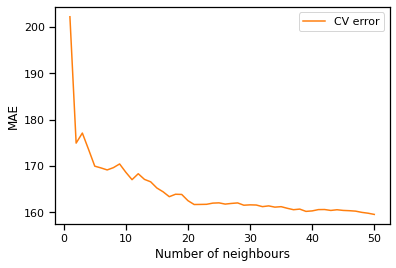

Cross validation MAE : 159.5514
Test MAE : 167.2139
Test RMSE : 251.0225


In [62]:
predictors=['NumStorePurchases', 'Marital_Status_Alone', 'Education_Graduation']
response=['MntWines']
test_mae_9, test_rmse_9, cv_mae_9 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_9.round(4)))
print('Test MAE : {}'.format(test_mae_9.round(4)))
print('Test RMSE : {}'.format(test_rmse_9.round(4)))

Chosen K: 46


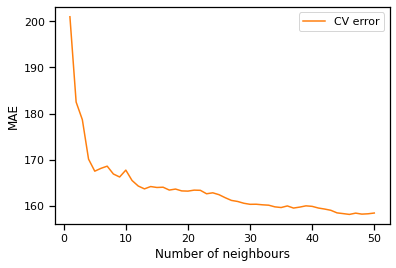

Cross validation MAE : 158.1715
Test MAE : 165.9874
Test RMSE : 250.3171


In [63]:
predictors=['NumStorePurchases', 'Marital_Status_Alone', 'Education_PhD']
response=['MntWines']
test_mae_10, test_rmse_10, cv_mae_10 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_10.round(4)))
print('Test MAE : {}'.format(test_mae_10.round(4)))
print('Test RMSE : {}'.format(test_rmse_10.round(4)))

Chosen K: 50


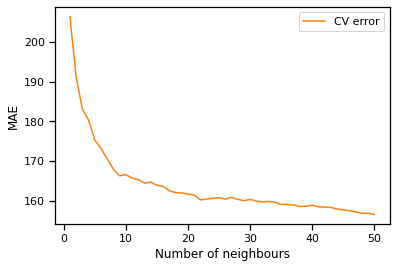

Cross validation MAE : 156.5748
Test MAE : 164.0333
Test RMSE : 250.3111


In [64]:
predictors=['NumStorePurchases', 'Marital_Status_Married', 'Education_Graduation']
response=['MntWines']
test_mae_11, test_rmse_11, cv_mae_11 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_11.round(4)))
print('Test MAE : {}'.format(test_mae_11.round(4)))
print('Test RMSE : {}'.format(test_rmse_11.round(4)))


Chosen K: 35


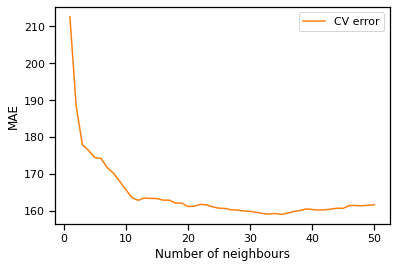

Cross validation MAE : 159.0241
Test MAE : 166.6462
Test RMSE : 250.5923


In [65]:
predictors=['NumStorePurchases', 'Marital_Status_Married', 'Education_PhD']
response=['MntWines']
test_mae_12, test_rmse_12, cv_mae_12 =  knn_test(predictors, response) 

print('Cross validation MAE : {}'.format(cv_mae_12.round(4)))
print('Test MAE : {}'.format(test_mae_12.round(4)))
print('Test RMSE : {}'.format(test_rmse_12.round(4)))

In [66]:
fairness = pd.DataFrame(columns=[' test MAE', 'test RMSE'], index=['Alone Graduate', 'Alone PhD', 'Married Graduate', 'Married PhD'], dtype='float64') 

fairness.iloc[0, 0] = test_mae_9
fairness.iloc[0, 1] = test_rmse_9

fairness.iloc[1, 0] = test_mae_10
fairness.iloc[1, 1] = test_rmse_10

fairness.iloc[2, 0] = test_mae_11
fairness.iloc[2, 1] = test_rmse_11

fairness.iloc[3, 0] = test_mae_12
fairness.iloc[3, 1] = test_rmse_12


fairness

,test MAE,test RMSE
Alone Graduate,167.213869,251.022496
Alone PhD,165.987448,250.317097
Married Graduate,164.033333,250.311104
Married PhD,166.646216,250.592250


**Loss Function**

In [67]:
def asymmetric_loss(y_true, y_pred, alpha):
    errors = y_pred - y_true
    loss = np.where(errors >= 0, alpha * errors**2, errors**2)
    return np.mean(loss)

In [68]:
from sklearn.model_selection import train_test_split
# dataset
predictors=['NumStorePurchases']
response=['MntWines']
X = data[predictors] 
y = data[response]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define a custom asymmetric loss function
def asymmetric_loss(y_true, y_pred):
    # Define the asymmetric cost factor (e.g., overpredictions are twice as costly)
    cost_factor = 2.0
    errors = y_true - y_pred
    absolute_errors = np.abs(errors)
    asymmetric_mae = np.mean(np.where(errors >= 0, absolute_errors, cost_factor * absolute_errors))
    return asymmetric_mae

# Create and train a linear regression model using the custom loss function
model = KNeighborsRegressor(n_neighbors = 50)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the asymmetric mean absolute error (weighted MAE)
asymmetric_mae = asymmetric_loss(y_test, y_pred)

# Calculate the regular MAE for comparison
mae = mean_absolute_error(y_test, y_pred)

print(f'Asymmetric MAE: {asymmetric_mae}')
print(f'Regular MAE: {mae}')

Asymmetric MAE: 263.3955952380952
Regular MAE: 173.25726190476192
